In [ ]:
! pip install geopandas

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
!pip show geopandas

Name: geopandas
Version: 0.14.3
Summary: Geographic pandas extensions
Home-page: 
Author: 
Author-email: Kelsey Jordahl <kjordahl@alum.mit.edu>
License: BSD 3-Clause
Location: /home/jean/.venv/hymap/lib/python3.11/site-packages
Requires: fiona, packaging, pandas, pyproj, shapely
Required-by: 


## Geopandas

**Geopandas** ajoute une couche capable de traiter l’information spatiale (des *geometries*) à Pandas sous forme de _dataframes_.
* elle intègre la bibliothèque _fiona_ pour charger différents formats de fichiers geospatiaux (.gpkg, .shp, etc.)
* elle permet de manipuler tant des fichiers de données vectorielles que des _rasters_ (.tif, .asc, etc.)
* elle peut gérer les systèmes de projection _CRS (Coordinates Reference System)_
* elle intègre la bibliothèque _shapely_ pour traiter des geometries (point, lignes, polygone) et réaliser des opérations sur celles-ci (calculer des longueurs, des intersections, etc.)
* grâce à _leaflet_ elle permet de visualiser rapidement des infos spatiales sur des fonds de cartes (methde ```.explore()```)


Comme d’autres bibliothèques, Geopandas embarque des jeux de données a vocation de démo :

In [41]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [42]:
worldmap_df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/tmp/ipykernel_179/1098640891.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap_df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [5]:
worldmap_df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [6]:
worldmap_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    float64 
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    int64   
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


Une info importante quand on manipule des données géospatiales et notamment des cartes est le _coordinate reference system_ :

In [46]:
worldmap_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Ici WGS 84 est le système de coordonnées en longitude/latitude (type GPS). Les valeurs en abscisses et ordonnées si on trace la carte seront donc les long/lat :

<Axes: >

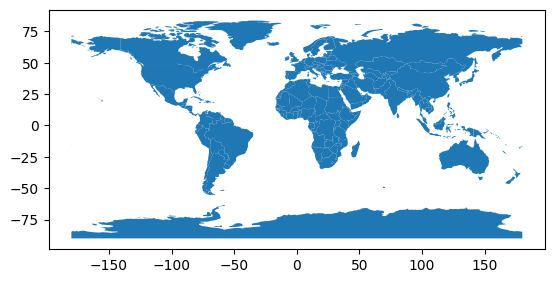

In [7]:
worldmap_df.plot()

<Axes: >

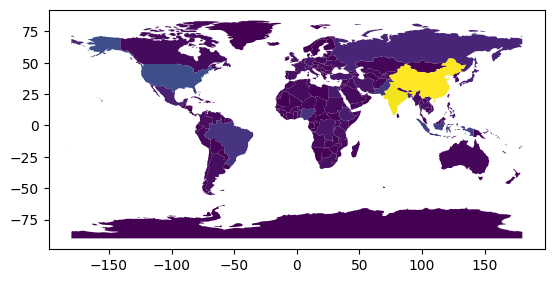

In [8]:
worldmap_df.plot('pop_est')

/tmp/ipykernel_179/3111832478.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  citiesmap_df = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


<Axes: >

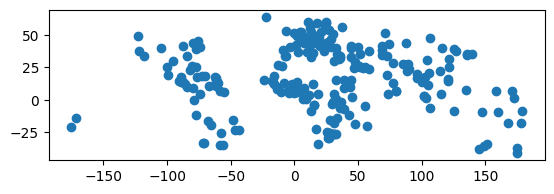

In [9]:
citiesmap_df = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
citiesmap_df.plot()

In [12]:
citiesmap_df.explore()

Il est possible que pour utiliser ̀```leaflet``` Jupyter vous demande « Make this Notebook Trusted to load map:File -> Trust Notebook ». Dans Jupyter Lab, il faut faire View -> Activate Command Palette et dans le champ de recherche taper ```trust``` vous pourrez choisir Trust Notebook, et confirmer.

On peut aussi superposer 2 plots : 

<function matplotlib.pyplot.show(close=None, block=None)>

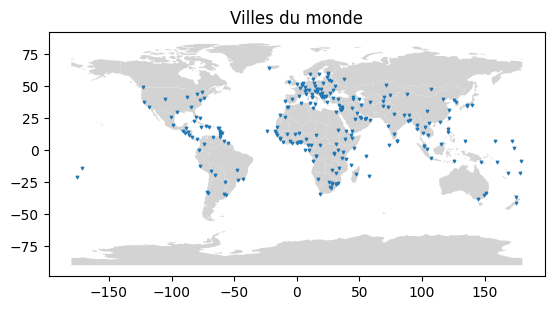

In [17]:
fig, ax = plt.subplots()

worldmap_df.plot(ax=ax, color='lightgray')
citiesmap_df.plot(ax=ax, marker='v', markersize=3)

plt.title('Villes du monde')
plt.show

Peut-on isoler une carte de l’Afrique ?
Regardons déjà la colonne « continent » :

In [18]:
worldmap_df.continent.unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

<Axes: >

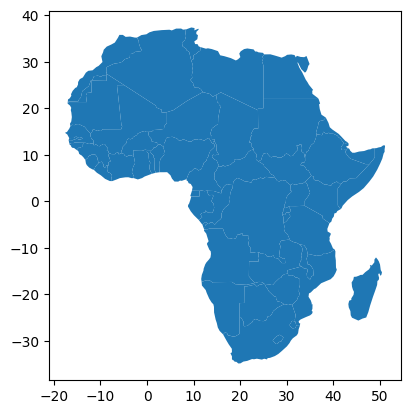

In [24]:
afriquemap_df = worldmap_df[worldmap_df['continent']=='Africa'].copy()
afriquemap_df.plot()

Calculons les coordonnées du centre de chaque pays :

In [25]:
afriquemap_df['CenterX'] = afriquemap_df['geometry'].map(lambda c: c.centroid.x)
afriquemap_df['CenterY'] = afriquemap_df['geometry'].map(lambda c: c.centroid.y)

Affichons maintenant la carte avec le code iso de chaque pays aux centres que nous venons de calculer :

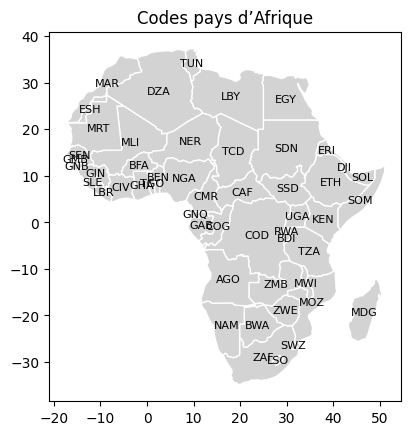

In [43]:
fig, ax = plt.subplots()
afriquemap_df.plot(ax=ax, color='lightgray', edgecolor='white')

for idx, row in afriquemap_df.iterrows():
    ax.text(row["CenterX"], 
            row["CenterY"],
            row["iso_a3"], 
            ha="center", 
            va="center", 
            size=8)

plt.title('Codes pays d’Afrique')
plt.show()

Affichons la population estimée pour chaque pays 

<Axes: >

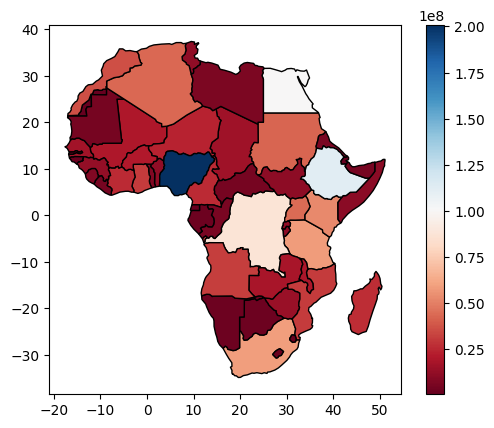

In [49]:
afriquemap_df.plot(column = "pop_est",
                   cmap='RdBu',
                   legend=True,
                   edgecolor='black', 
                   label='Population estimate per state')

## Exercice

Plus compliqué : aggrégeons des données de sources différentes !

1. Trouver des données chiffrées avec info geographique (pays, villes…). Attention, ne pas prendre des données déjà agrégées par pays, régions, etc. c’est le but de l’exercice ;)
2. Merger/groupby ces données pour calculer des scores (moyennes, décompte, pourcentage, ce que vous voulez !) par entitées géographiques, par exemple pays, régions, arrondissements, en fonction de la carte dont vous disposez (il faudra sûrement recoder / renommer des colonnes de réf. pays/région, etc pour pouvoir merger sur un df geospatial)
3. Afficher une carte qui associe un code couleur à chaque valeur du score (palette, « température »)